In [270]:
# importation des packages
import os
import pandas as pd
import math
from math import *
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import sklearn
from sklearn import datasets 
from sklearn.tree import DecisionTreeClassifier,plot_tree # pour un arbre de decision
from sklearn.preprocessing import LabelEncoder ,StandardScaler
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import confusion_matrix ,classification_report ,accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors  import KNeighborsClassifier as knn
from sklearn.decomposition import PCA


# Charger les données

In [254]:
os.getcwd()

ri = 'C:\\Users\\valerie\\Documents'
os.chdir(ri)

data  = pd.read_csv('winequality-red.csv', sep = ';')
data
data.head()
#data.info()


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

# 1. Prétraitement des données et élimination  des données manquantes 

**verfication de la presence des données** 
  ce jeu de données contient les caracteristiques qu'on retrouve dans du vin rouge , ainsi que ses qualités.
 - **fixed acidityou acidité fixe** : c'est un caracteristique qui confere au vin l'acidité et la resistence aux infection.
 - **volatile acidity ou acidité volatile** : c'est une mesure des acides volatils (ou gazeux) du vin
 - **residual sugar ** : mesure la douceur du vin
 - **chlorides** : contribue majoritairement a la salinité du vin , cest en fait la quantité de sel presentes dans le vin.
 - **free sulfur dioxide ou anhydride sulfureux libre.** : utilisé pour la prevention du vin par oxydation et alteration microbienne 
 - **total sulfur dioxide** :
 - **density** :
 - **pH** : le PH est utilise pour verifier l'acidité
 - **alcohol** : pourcentage d'alcool present dans le vin
 - **quality** : cest la combinaison de nombreux facteurs differentstels ceux presenté ci dessus. 

Le jeu de données dont nous disposons contient 1599 lignes et  12 colonnes . Il convient de le voir de plus pres pour  verifier s'il possede des données anormales, lesquelles seront retirées du jeu .

In [233]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

On constate qu'il n'y a **aucune valeur manquante dans notre jeu de données** .

# 2. Exploration des données 

Commençons par decrire notre base de données


### Description des données .

[]

<Figure size 1000x800 with 0 Axes>

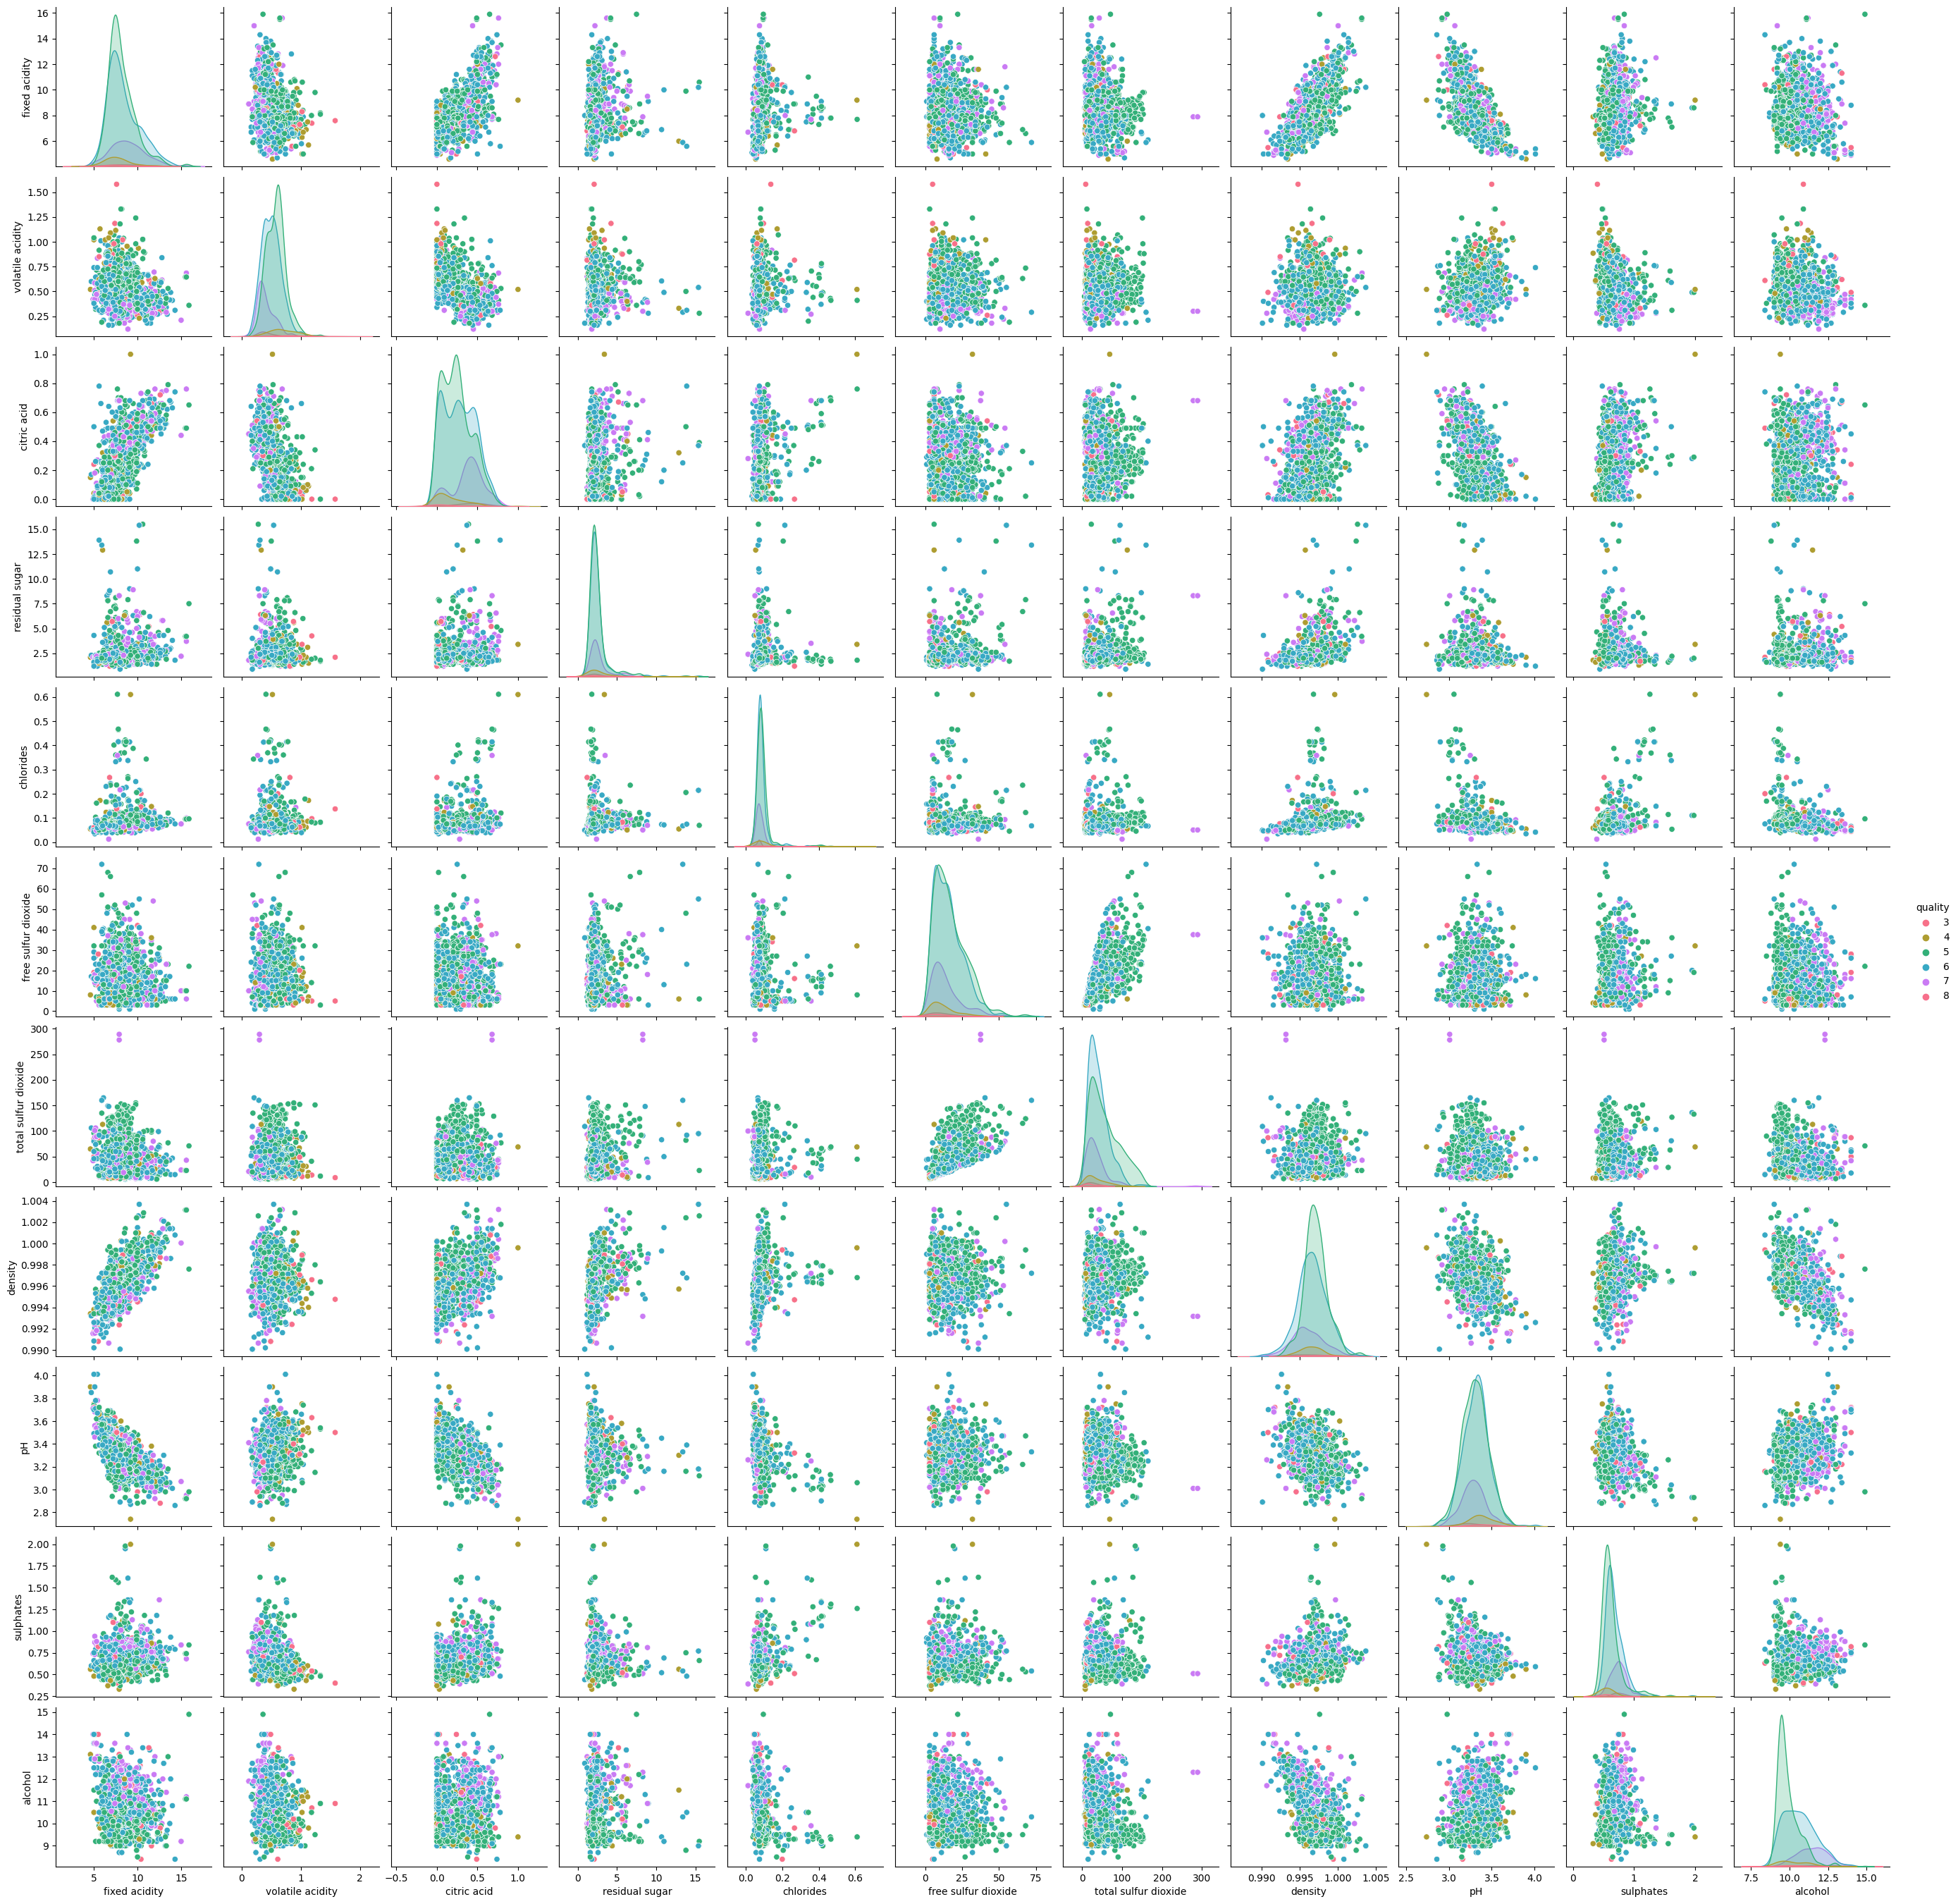

In [255]:
plt.figure(figsize =(10,8))
sns.pairplot(data,hue="quality" ,palette ="husl")
plt.plot()



Ce graphe nous donne les representions des liens entre toutes les autres variables  sauf la variable quality

In [327]:
data.nunique()
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     0.534709  
std       0.154386     0.169507     1.065668     0.498950  
min       2.740000     0.330000     8.400000     0.000000  
25%       3.210000     0.550000     9.500000     0.000000  
50%       3.310000     0.620000    10.200000     1.000000  
75%       3.400000     0.730000    11.100000     1.000000  
max       4.010000     2.000000    14.900000     1.000000

On retrouve ci-dessus la description de ces differentes carateriques.

### 2.1.Visualisation

- histogramme des valeurs de variables 
- boxplot 


### distribution de la qualité

In [215]:
sns.countplot(data , x="quality")

<AxesSubplot:xlabel='quality', ylabel='count'>

Au regard du graphe ci-dessus , on peut affirmer sans ambiguité que les classes 6 et 5 sont mieux representées que les autres .
   cette remarque peut justifier le fait que l'on classifie les données de quality en deux classes .

In [259]:
data.quality.describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

**commentaire**
 Le vin a une qualite moyenne d'environ 5.63 avec un ecart-type de 0.81.La plus grande qualite du vin est de 8 et la plus petite est de 3 .De plus , 25% de la qualité du vin est inferieure a 5 et 75% est inferieure a 6 , avce une qualité moyenne de 6.

Au vu de cet histogramme , on constate que certaines classes  sont plus representées par rapport d'autres  autres . Ce aspect est egalement observer chez les autres variables . Il convient donc des les ramener au meme ordre de grandeurs .


### Boxplot

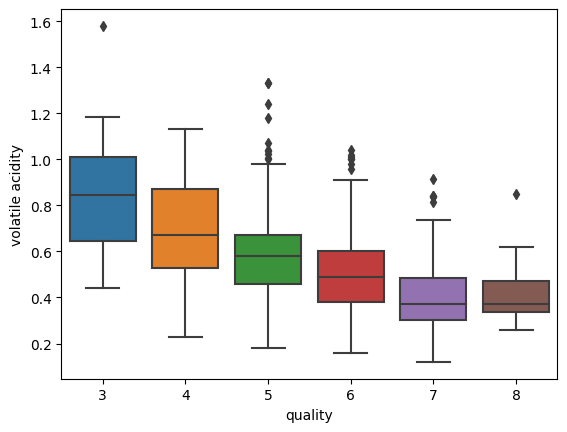

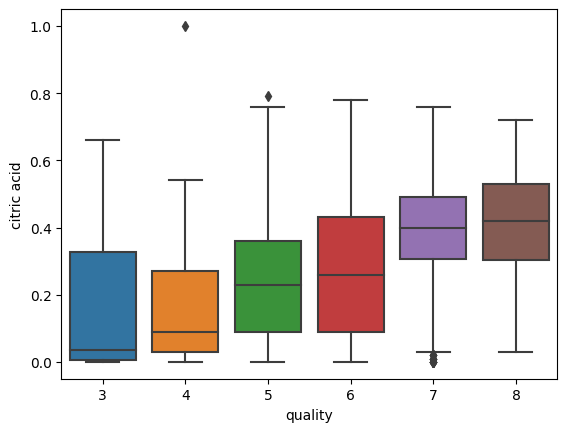

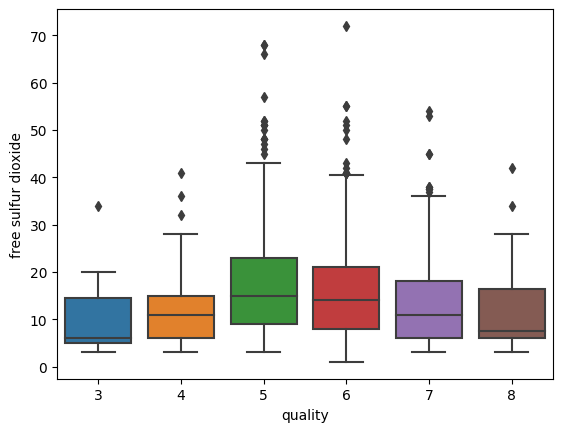

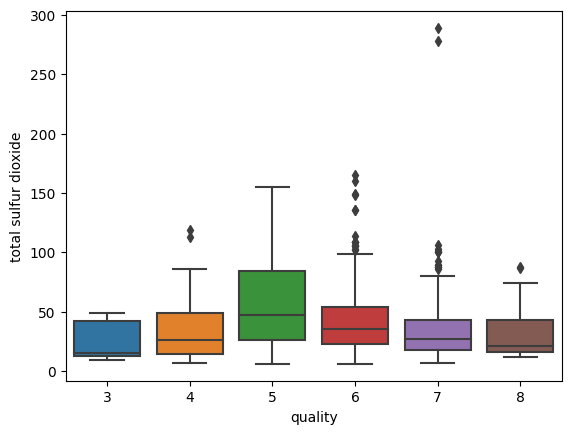

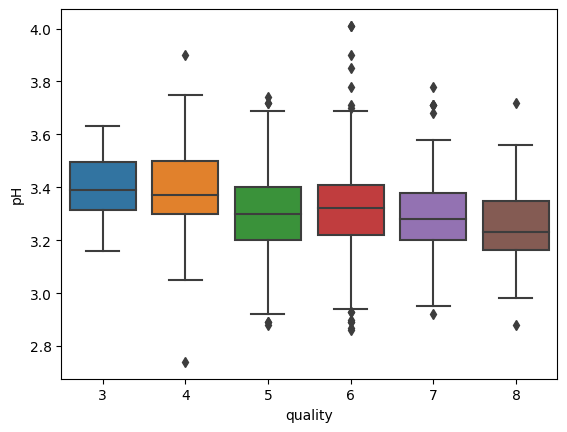

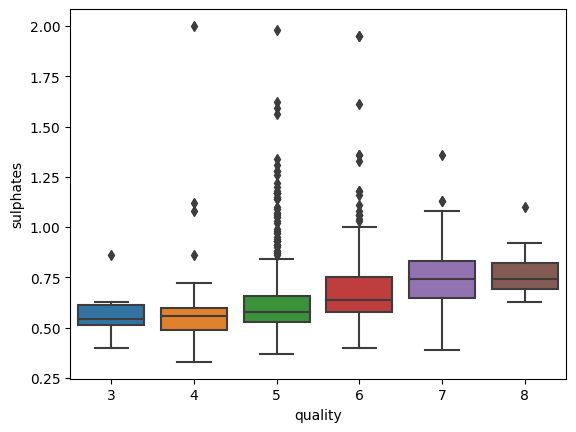

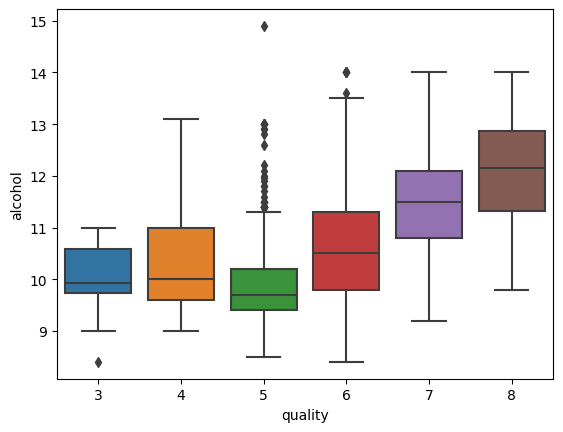

In [216]:
for i in data.columns[:-1]:
    plt.figure()
    sns.boxplot(x=data['quality'],y=data[i])
    plt.plot()

Au regard de ces boite à moustache , on remarque qu'il y a dans les données des valeurs aberrantes . Par ailleurs , ces graphiques ne nous donnent pas assez d'éléments pointilleux  pour trancher sur l'impact de ces composantes surla qualité du vin.

### Liens entre toutes les differentes variables 

[]

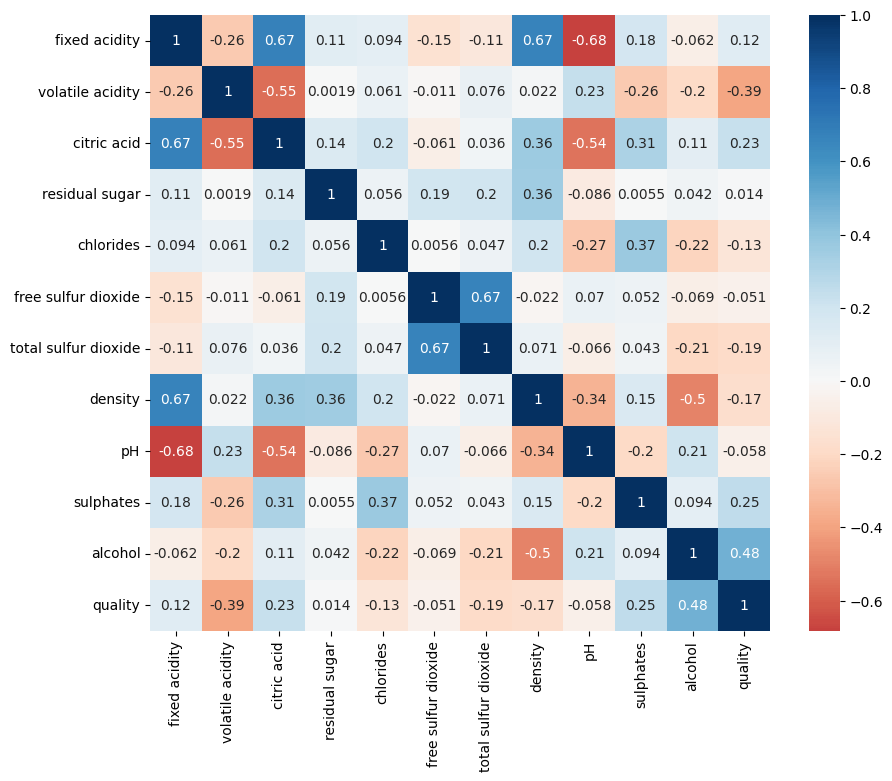

In [217]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr() , cmap ='RdBu',center =0,annot =True)
plt.plot()



Au regard de ce graphique de correlation , il est flagrant ant de remarquer que les correlations entre ces differentes varibles ne depassent pas 0.69. De plus , la plus grande valeur est de 0.67 et cette valeur concerne en rien la variable quality


# 4. implementation des methodes de machine Learning

### a. determinons la meilleure methode  au sens des moindres carrés parmis toutes celles applicable aux données

Avant d'appliquer ces methodes , il convient de remarquer que l'espace image de la variable **quality** à expliquer  est  fini non ordonne. Le probleme qui se pose est celui de la prediction de la qualite du vin sur la base de ces dix (10) premieres variables du jeu de données .On peut ainsi se servir des methodes de classification. Nous allons pour donc appliquer les methodes de **Classifier des k plus proches voisins , et l'abre binaire de classification**.

In [275]:
data
    

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        1  
4         9.4        0  
...       ...      ...  
1594     10.5        0  
1595     11.2        1  
1596     11.0        1  
1597     10.2        0  
1598     11.0        1  

[1599 rows x 12 columns]

## ACP

In [262]:
bins = (2, 5,8)

group_names = ['bad','good']
data['quality'] = pd.cut(data['quality'] , bins = bins ,labels = group_names )


In [279]:
enc = LabelEncoder()
data['quality'] = enc.fit_transform(data['quality'])


In [278]:
x =data[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]]
y= data['quality']

In [280]:
acp =PCA()
# composantes princcipales
composante = pd.DataFrame(acp.fit_transform(x)) # dataframe constitué

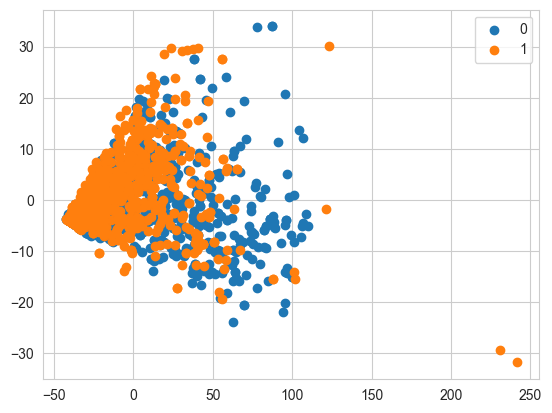

In [281]:
plt.figure()

for qualit in y.unique() :
    indices = y == qualit
    plt.scatter(composante.loc[indices][0],composante.loc[indices][1],label  = qualit)
plt.legend(loc="best")
plt.show()

Bienque ce nuage de pointes semble tres concentré vers l'axe des ordonnées positifs ,il semble qu'on peut faire une separation entre les deux classes .

## criteres de comparaison

In [312]:
OutRisque={
    "RegLog":1.0,
    "knn":1.0,
    "DT":1.0,
}

OutAUC = {
    "RegLog":0.0,
    "knn" :0.0,
    "DT":0.0}

## a.1 Regression Logistique

**Sur toutes les données**

In [313]:
# separation des données en train test
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size = 0.35,shuffle = True)
# instanciation
reg =LogisticRegression()

# estimation.

reg.fit(x_train,y_train)

c:\users\valerie\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [316]:
# prediction
y_new_pred = reg.predict(x_test)

# Matrice de confusion

print(f"matrice de confusion ={confusion_matrix(y_test,y_new_pred)}")

# risque apparent

print(f"risque apparent ={1-accuracy_score(y_test,y_new_pred)}")


risque_rgl = 1-accuracy_score(y_test,y_new_pred)
OutRisque["RegLog"]= risque_rgl

#AUC

OutAUC["RegLog"]=roc_auc_score(y_test, probs)



matrice de confusion =[[204  65]
 [ 76 215]]
risque apparent =0.2517857142857143


In [317]:
risque_rgl

0.2517857142857143

### Courbe Roc

In [304]:

# probabilite estimées utilisées comme score(x)

probs =reg.predict_proba(x_test)[:,1]
probs

array([0.23762985, 0.34454584, 0.23826982, 0.88529381, 0.13270028,
       0.18309463, 0.83107831, 0.8805207 , 0.23702497, 0.14712512,
       0.46307495, 0.70499741, 0.6312464 , 0.59412548, 0.18488234,
       0.56155055, 0.62774503, 0.4463235 , 0.34866784, 0.35376305,
       0.25382037, 0.68918264, 0.47204323, 0.20160097, 0.74579141,
       0.88439326, 0.56973911, 0.66871811, 0.30532654, 0.42949869,
       0.7393183 , 0.39834325, 0.28144326, 0.17617776, 0.17301221,
       0.33848076, 0.61444822, 0.80849515, 0.50038688, 0.17824079,
       0.1116364 , 0.75949603, 0.9429273 , 0.75201334, 0.25626641,
       0.76845545, 0.86009899, 0.67793656, 0.82080406, 0.85632561,
       0.55548125, 0.44153592, 0.58986221, 0.23702184, 0.18099353,
       0.23500119, 0.23406996, 0.93687025, 0.46144501, 0.71751541,
       0.29630336, 0.92592744, 0.78345791, 0.15260042, 0.56166906,
       0.13815027, 0.80646843, 0.74406734, 0.7233903 , 0.2304014 ,
       0.88563429, 0.31942159, 0.91500278, 0.33282169, 0.82235

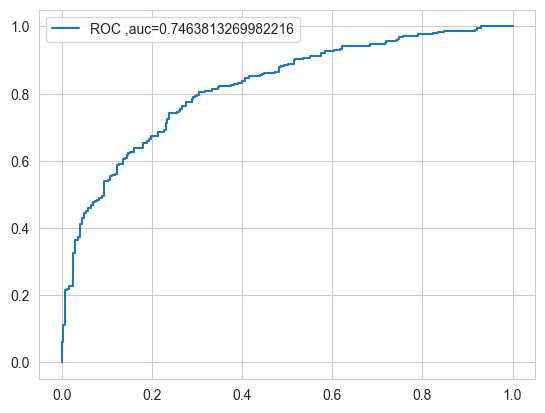

In [305]:
# courbe ROC
fpr,tpr ,thresholds =  roc_curve(y_test, probs , pos_label=1)
auc = roc_auc_score(y_test,y_new_pred )
plt.figure()
plt.plot(fpr,tpr,label ="ROC ,auc="+str(auc))
plt.legend(loc='best')
plt.show()

### a.2. KneighborsClassifier

#### selection de l'hyperparametre par validation croisée


In [306]:
def risque(k):
    knn_=knn(n_neighbors=k)
    risques =cross_val_score(knn_ ,x,y,cv=5)
    return 1-np.mean(risques)

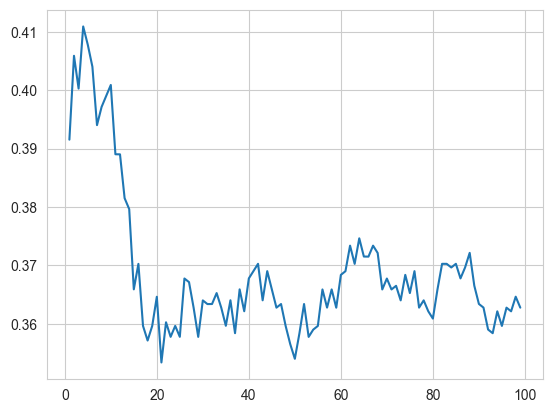

In [294]:
# valeurs candidates de k

ks =list(range(1,100))
risques =[risque(k) for k in ks]

# graphique

plt.figure()
plt.plot(ks,risques)
plt.show()

In [295]:
# k optimal

risqueMin = np.min(risques)
k_hat = np.argwhere(risques==risqueMin)[0][0]+1
OutRisque["knn"] = risqueMin

In [296]:
k_hat 

21

le meilleur classifieur des k plus peoches voisin correspond à k_hat = 21

In [320]:
# instancier
clas =knn(n_neighbors=k_hat,metric = 'euclidean')

# estimation

clas.fit(x_train ,y_train)

# pediction 

y_new_pred=clas.predict(x_test)

# proba estimée
probs =clas.predict_proba(x_test)[:,1]
probs
# risque apparent

print(f"risque apparent ={1-accuracy_score(y_test,y_new_pred)}")
risque_knn =1-accuracy_score(y_test,y_new_pred)
OutRisque["knn"]= risque_knn

#AUC

OutAUC["knn"]=roc_auc_score(y_test, probs)




risque apparent =0.3410714285714286


In [319]:
# courbe ROC
fpr,tpr ,thresholds =  roc_curve(y_test, probs )
auc = roc_auc_score(y_test,y_new_pred )
plt.figure()
plt.plot(fpr,tpr,label ="ROC ,auc="+str(auc))
plt.legend(loc='best')
plt.show()

## a.3.DecisionTrees


In [321]:
# instancier
clas =DecisionTreeClassifier()

# estimation

clas.fit(x_train ,y_train)

# pediction 

y_new_pred =clas.predict(x_test)


# risque apparent

print(f"risque apparent ={1-accuracy_score(y_test,y_new_pred)}")
risque_DT =1-accuracy_score(y_test,y_new_pred)
OutRisque["DT"]= risque_DT


# proba estimée
probs =clas.predict_proba(x_test)[:,1]
probs

#AUC

OutAUC["DT"]=roc_auc_score(y_test, probs)


risque apparent =0.2785714285714286


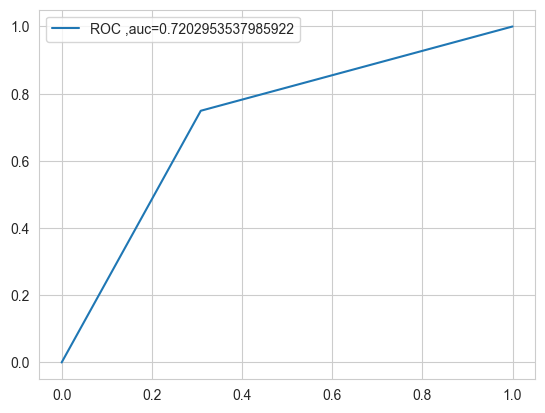

In [323]:
# courbe ROC
fpr,tpr ,thresholds =  roc_curve(y_test, probs )
auc = roc_auc_score(y_test,y_new_pred )
plt.figure()
plt.plot(fpr,tpr,label ="ROC ,auc="+str(auc))
plt.legend(loc='best')
plt.show()

In [324]:
OutRisque

{'RegLog': 0.2517857142857143,
 'knn': 0.3410714285714286,
 'DT': 0.2785714285714286}

In [325]:
OutAUC

{'RegLog': 0.5092234187968676,
 'knn': 0.7146041722556498,
 'DT': 0.7202953537985922}

Au vu de ces resultats , il ressort que les meilleures methodes sont celles de **DecisionTrees
 ou Arbre de Decision et la Regression Logistique** .
Je dirais que la methode des DecisionTrees est la meilleures.

## Caracteristiques du vin les plus pertinentes 

Sur les 11 caracteristiques que nous avons examinées , les 3 principales caracteristiques qui peuvent aider 
le vigneron à brasser un bon vin rouge  sont de faible niveau de dioxide de souffer et de niveau eleve de sulfate d'aclool et d'acide citrique